<a href="https://colab.research.google.com/github/MahaswetaTalik/DEEP_LEARNING/blob/main/SGD_Momentum_%2B_NAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)
X = np.linspace(-2, 2, 200)
y = 3 * X**2 + 2 + np.random.normal(0, 0.5, size=X.shape)

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [5]:
def build_model(optimizer):
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model

In [6]:
# Plain SGD
sgd = SGD(learning_rate=0.01)

# SGD with Momentum
momentum = SGD(learning_rate=0.01, momentum=0.9)

# SGD with Nesterov Momentum
nesterov = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

In [7]:
history_sgd = build_model(sgd).fit(X, y, epochs=100, verbose=0)
history_momentum = build_model(momentum).fit(X, y, epochs=100, verbose=0)
history_nag = build_model(nesterov).fit(X, y, epochs=100, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


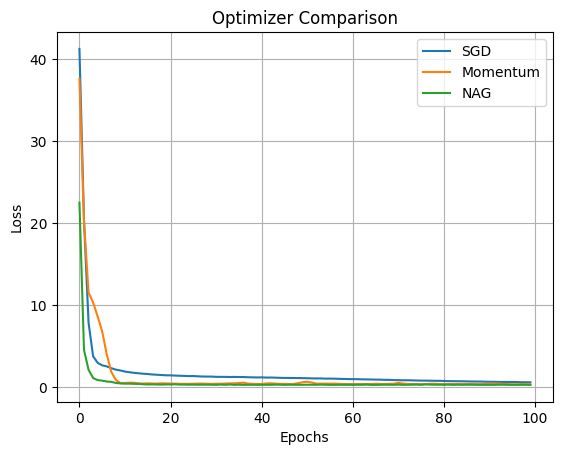

In [8]:
plt.plot(history_sgd.history['loss'], label='SGD')
plt.plot(history_momentum.history['loss'], label='Momentum')
plt.plot(history_nag.history['loss'], label='NAG')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Optimizer Comparison')

plt.legend()
plt.grid(True)

plt.show()